# Evaluating Pittsburgh's Neighborhoods Through Restaurant Inspection Data

## 1. Introduction

### 1.1 Project Context

- Data Source: [Allegheny County Restaurant/Food Facility Inspections and Locations](https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations)
- This evaluation seeks to determine the top neighborhood in Pittsburgh in terms of public health.
- A crucial element of the following analysis involves examining the food services across various neighborhoods.
- The goal is to employ a data-driven method to assess each area by the health and safety standards of its food venues.

### 1.2 Data Source

- This evaluation utilizes the "Allegheny County Restaurant/Food Facility Inspections and Locations" dataset, maintained by the Allegheny County Health Department. This dataset provides a comprehensive record of routine inspections for facilities that produce, distribute, and sell food products within Allegheny County.
- Each entry in this dataset includes detailed violation data and geocoded locations.
- The data covers inspections from January 2016 to the present and is updated monthly.

### 1.3 Approach & Structure

- The metric developed for this evaluation focuses on the frequency and severity of health inspection violations in food facilities as a proxy for overall neighborhood health standards.
- It is assumed that neighborhoods with fewer and less severe violations are likely to be more desirable places to live.
- This evaluation introduces the metric, explains the features measured, and then applies this metric to determine which neighborhood in Pittsburgh can be considered the "best" based on the defined criteria.
- The evaluation includes data visualizations to compare neighborhoods and track changes over time.

### 1.4 Anticipated Outcomes

By the end of this evaluation, the goal is to reveal patterns about neighborhood compliance with health regulations, which could have broader implications for public health and real estate values.

## 2. The Metric

- Timeliness of Data: The violation records before Jan 1, 2016 will be filtered out.
- Adaquacy of Data: There are neighborhoods with very little violation data due to various reasons. It could be data gaps or simply lack of restaurants. Neighborhoods where the number of violtions is less than 1000 will be filtered out.
- Number of Violations: Less violations, better public health, and better neighborhood!
- Components of Violations: Violations are rated with three levels in the original data. Larger ratio of "low" violations is more desirable.
    - Low: These are minor issues that have a low risk of causing significant harm or disruption.
    - Medium: These issues present a moderate risk
    - High: These are serious violations or issues that pose a high risk of harm or severe consequences.

## 3. The Best Neighborhood

Firstly, load the dataset.

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'Violation_Records.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

,_id,encounter,id,placard_st,facility_name,bus_st_date,description,description_new,num,street,...,zip,inspect_dt,start_time,end_time,municipal,rating,low,medium,high,url
0,106809214,201408280014,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,"Fabrication, Design, Installation and Maintenance",5414,Walnut St,...,15232.0,2014-08-25,09:30:00,10:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
1,106809215,201408280014,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Administrative,5414,Walnut St,...,15232.0,2014-08-25,09:30:00,10:45:00,Pittsburgh-107,V,NaN,NaN,NaN,http://appsrv.alleghenycounty.us/reports/rwser...
2,106809216,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Hot Holding Temperatures,5414,Walnut St,...,15232.0,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,F,F,T,http://appsrv.alleghenycounty.us/reports/rwser...
3,106809217,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Facilities to Maintain Temperature,5414,Walnut St,...,15232.0,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
4,106809218,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Cleaning and Sanitization,5414,Walnut St,...,15232.0,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...


Unfortunately, the dataset contains all violation records for Allegheny County. Filtering out places other than Pittsburgh is needed.

In [3]:
# Filter out rows where the 'municipal' column does not contain 'Pittsburgh'
pittsburgh_data = data[data['municipal'].str.contains("Pittsburgh")]

# Display the first few rows of the filtered data
pittsburgh_data.head()

,_id,encounter,id,placard_st,facility_name,bus_st_date,description,description_new,num,street,...,zip,inspect_dt,start_time,end_time,municipal,rating,low,medium,high,url
0,106809214,201408280014,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,"Fabrication, Design, Installation and Maintenance",5414,Walnut St,...,15232.0,2014-08-25,09:30:00,10:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
1,106809215,201408280014,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Administrative,5414,Walnut St,...,15232.0,2014-08-25,09:30:00,10:45:00,Pittsburgh-107,V,NaN,NaN,NaN,http://appsrv.alleghenycounty.us/reports/rwser...
2,106809216,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Hot Holding Temperatures,5414,Walnut St,...,15232.0,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,F,F,T,http://appsrv.alleghenycounty.us/reports/rwser...
3,106809217,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Facilities to Maintain Temperature,5414,Walnut St,...,15232.0,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
4,106809218,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Cleaning and Sanitization,5414,Walnut St,...,15232.0,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...


Timeliness of data is important. Filter out all violation records whose inspection date is before Jan 1, 2016.

In [4]:
# Convert 'inspect_dt' to datetime format and filter out dates before Jan 1, 2016
pittsburgh_data['inspect_dt'] = pd.to_datetime(pittsburgh_data['inspect_dt'], errors='coerce')
filtered_data = pittsburgh_data[pittsburgh_data['inspect_dt'] >= '2016-01-01']

# Display the first few rows of the further filtered data
filtered_data.head()

<ipython-input-4-4918194bb15f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pittsburgh_data['inspect_dt'] = pd.to_datetime(pittsburgh_data['inspect_dt'], errors='coerce')


,_id,encounter,id,placard_st,facility_name,bus_st_date,description,description_new,num,street,...,zip,inspect_dt,start_time,end_time,municipal,rating,low,medium,high,url
10,106809224,201604070053,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Date Marking of Food,5414,Walnut St,...,15232.0,2016-04-07,13:20:00,15:00:00,Pittsburgh-107,V,F,T,F,http://appsrv.alleghenycounty.us/reports/rwser...
11,106809225,201604070053,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Employee Personal Hygiene,5414,Walnut St,...,15232.0,2016-04-07,13:20:00,15:00:00,Pittsburgh-107,V,F,F,T,http://appsrv.alleghenycounty.us/reports/rwser...
59,106809273,201611180002,213,1,The Strip District Meats,1970-01-01,Food Processor,Cleaning and Sanitization,2123,Penn Avenue,...,15222.0,2016-11-16,14:30:00,15:30:00,Pittsburgh-102,V,T,F,T,http://appsrv.alleghenycounty.us/reports/rwser...
60,106809274,201604070053,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Cleaning and Sanitization,5414,Walnut St,...,15232.0,2016-04-07,13:20:00,15:00:00,Pittsburgh-107,V,T,F,T,http://appsrv.alleghenycounty.us/reports/rwser...
61,106809275,201610270019,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Date Marking of Food,5414,Walnut St,...,15232.0,2016-10-27,12:10:00,14:00:00,Pittsburgh-107,V,F,T,F,http://appsrv.alleghenycounty.us/reports/rwser...


Then sort the data by Zip code and visualize the number of violations of them with a bar chart.

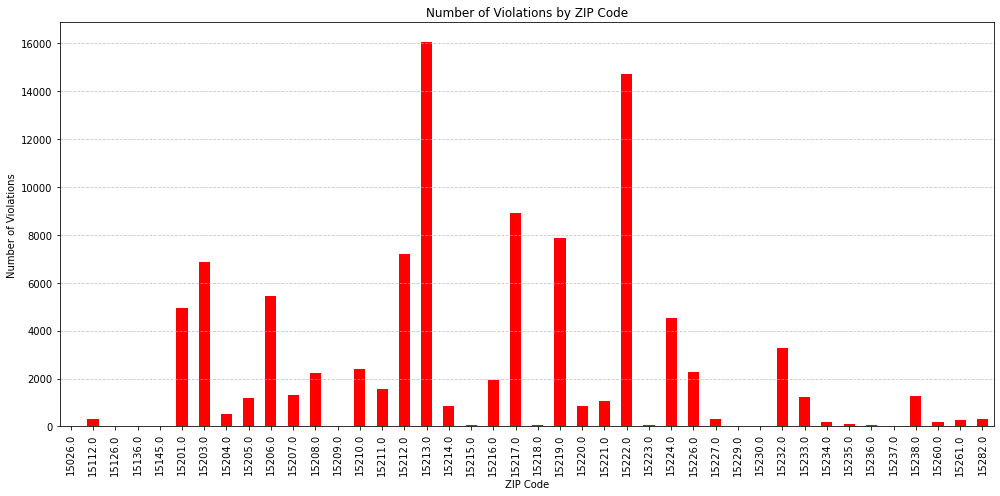

In [5]:
import matplotlib.pyplot as plt

# Filter data for 'V' ratings
v_ratings = filtered_data[filtered_data['rating'] == 'V']

# Group by 'zip' and count 'V' ratings
v_count_by_zip = v_ratings.groupby('zip').size()

# Plotting the data
plt.figure(figsize=(14, 7))
v_count_by_zip.plot(kind='bar', color='red')
plt.title('Number of Violations by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Violations')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


Notice that many of them have very little number of violations. It is assumed that very little number of violations is due to data gaps or lack of restaurants. Adequacy of data is valued, so neiborhoods whose number of violations is less than 1000 should be filtered out. The remaining neiborhoods will be considered as meanningful for further discussion.

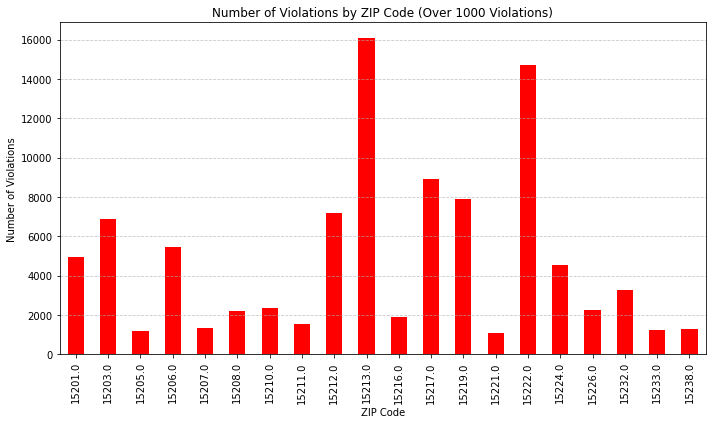

In [8]:
# Filter out ZIP codes with fewer than 1000 violations
significant_violations = v_count_by_zip[v_count_by_zip >= 1000]

# Plotting the filtered data
plt.figure(figsize=(10, 6))
significant_violations.plot(kind='bar', color='red')
plt.title('Number of Violations by ZIP Code (Over 1000 Violations)')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Violations')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

To create a grading method that reflects both the frequency and severity of health inspection violations within the significant_violations dataset, we'll consider the following:
- **Frequency of Violations**: The total number of violations in each ZIP code.
- **Severity Weights**: Assign weights to the severity levels—low, medium, and high.
    - Low: 1
    - Medium: 2
    - High: 3
    

Using these weights, we can calculate a weighted sum of violations for each ZIP code to reflect the severity impact more heavily. Normalize the weighted sums to a scale of [0, 1], where 0 is the worst and 1 is the best. The normalization will be based on the formula:

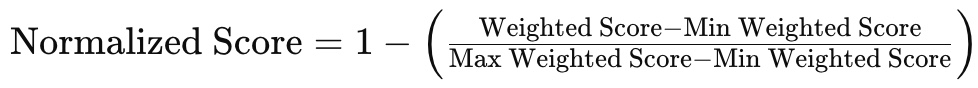

In [24]:
from IPython.display import Image
Image("Formula.jpeg")

Using the normalized scores, rank all the neighborhoods.

In [15]:
# Retrieve counts for low, medium, and high severity violations for all ZIP codes with over 1000 violations
all_low_counts = filtered_data[(filtered_data['rating'] == 'V') & (filtered_data['low'] == 'T')].groupby('zip').size().reindex(significant_violations.index, fill_value=0)
all_medium_counts = filtered_data[(filtered_data['rating'] == 'V') & (filtered_data['medium'] == 'T')].groupby('zip').size().reindex(significant_violations.index, fill_value=0)
all_high_counts = filtered_data[(filtered_data['rating'] == 'V') & (filtered_data['high'] == 'T')].groupby('zip').size().reindex(significant_violations.index, fill_value=0)

# Calculate the weighted scores based on severity
weights = {'low': 1, 'medium': 2, 'high': 3}
weighted_scores = (all_low_counts * weights['low'] + all_medium_counts * weights['medium'] + all_high_counts * weights['high'])

# Normalize the scores to a [0, 1] scale where 0 is worst and 1 is best
min_score = weighted_scores.min()
max_score = weighted_scores.max()
normalized_scores = 1 - ((weighted_scores - min_score) / (max_score - min_score))

# Sort by normalized score from highest to lowest
sorted_scores = normalized_scores.sort_values(ascending=False)

sorted_scores

zip
15221.0    1.000000
15205.0    0.996423
15233.0    0.990221
15207.0    0.989497
15238.0    0.982887
15211.0    0.964460
15216.0    0.942593
15208.0    0.927744
15210.0    0.925842
15226.0    0.921360
15232.0    0.834752
15224.0    0.770283
15201.0    0.755795
15206.0    0.716045
15203.0    0.637224
15212.0    0.603540
15219.0    0.567639
15217.0    0.491579
15222.0    0.105487
15213.0    0.000000
dtype: float64

1. East Hills
2. Fairywood
3. Manchester
4. Regent Square
5. Fox Chapel
6. Mount Washington
7. Banksville
8. North Point Breeze
9. Mount Oliver
10. Brookline
11. Shadyside
12. Bloomfield
13. Central Lawrenceville
14. Stanton Heights
15. South Side Slopes
16. Brighton Heights
17. Central Business District
18. Squirrel Hill South
19. Troy Hill
20. North Oakland

## Conclusion

The original data has been filtered to concentrate on inspections after Jan 1, 2016 in Pittsburgh. Through analysis on the remaining data with a focus of total number of violations and the component ratios of violations, it is concluded that:

**The best neighborhood in Pittsburgh is 15221, East Hills!**